# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Leo Mensler

Datum: 17.11.23

Gruppe: 79

## Forschungsfrage

Die Forschungsfrage lautet: Überprüfen und validieren des in der Aufgabenstellung gegebenen Abkühlunggesetzes nach Newton mthilfe einer Temperaturmessung eines abkühlenden Heißgetränks.

## Versuchsaufbau und Durchführung

Ich habe meinen Versuch wie unten dargestellt aufgebaut. Dazu habe ich zunächst den raspberry Pi wie in der Aufgabenstellung gegeben mit den Sensoren verbunden. Danach habe ich den raspberryPi selbstverständlich auch mit meinem Rechner verbunden um den Versuch starten und beenden zu können.
Nachdem ich mit einer Probe-Messung herausgefunden habe welcher Sensor welcher ist (siehe unterschiedliche Namen in Datenblättern) konnte ich mit der Messung beginnen. Dafür habe ich die Raumtemperatur und die Temperatur des abkühlenden Tees über einen Zeitraum von rund 800sec gemessen. Gestartet und beendet habe ich die Messung mithilfe des "main" Programs welches ich geschrieben habe.


<img src="figures/newton.jpeg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path = "./data/data_newton/data_newton.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

import h5py as h5

with h5.File(path) as f:
    authors = f.attrs["authors"]
    created = f.attrs["created"]
    experiment = f.attrs["experiment"]
    group_number = f.attrs["group_number"]
    
    #Nun greife ich auf die einzelnen Untergruppen meiner HDF5 Datei zu
    raw_data = f["RawData"]
    
    #Nun kann ich die Sensor UUIDs als Liste auslesen
    sensor_ids = list(raw_data.keys())
        
    sensor_hot = raw_data[sensor_ids[0]]
    sensor_enviroment = raw_data[sensor_ids[1]]
      
    #Auslesen der Temperatur der jeweiligen Sensoren als Liste
    temperature_hot = list(sensor_hot["temperature"])
    temperature_enviroment = list(sensor_enviroment["temperature"])
    
    #Auslesen des Timestamps als Liste
    time_sensor_hot = list(sensor_hot["timestamp"])
    time_sensor_enviroment = list(sensor_enviroment["timestamp"])
    
    #Da meine Anfangswerte nicht geeignet sind(Sensor hat sich zunächst auf die Flüßigkeitstemperatur erwärmt) "scheide"
    #ich die ersten 30 Werte weg
    temperature_hot = temperature_hot[30:]
    temperature_enviroment = temperature_enviroment[30:]
    time_sensor_hot = time_sensor_hot[30:]
    time_sensor_enviroment = time_sensor_enviroment[30:]
    
    l1 = len(temperature_hot)
    l2 = len(time_sensor_enviroment)
    
    l3 = len(time_sensor_hot)
    l4 = len(time_sensor_enviroment)
    
    print(l1,l2,l3,l4)
# DONE #

473 473 473 473


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


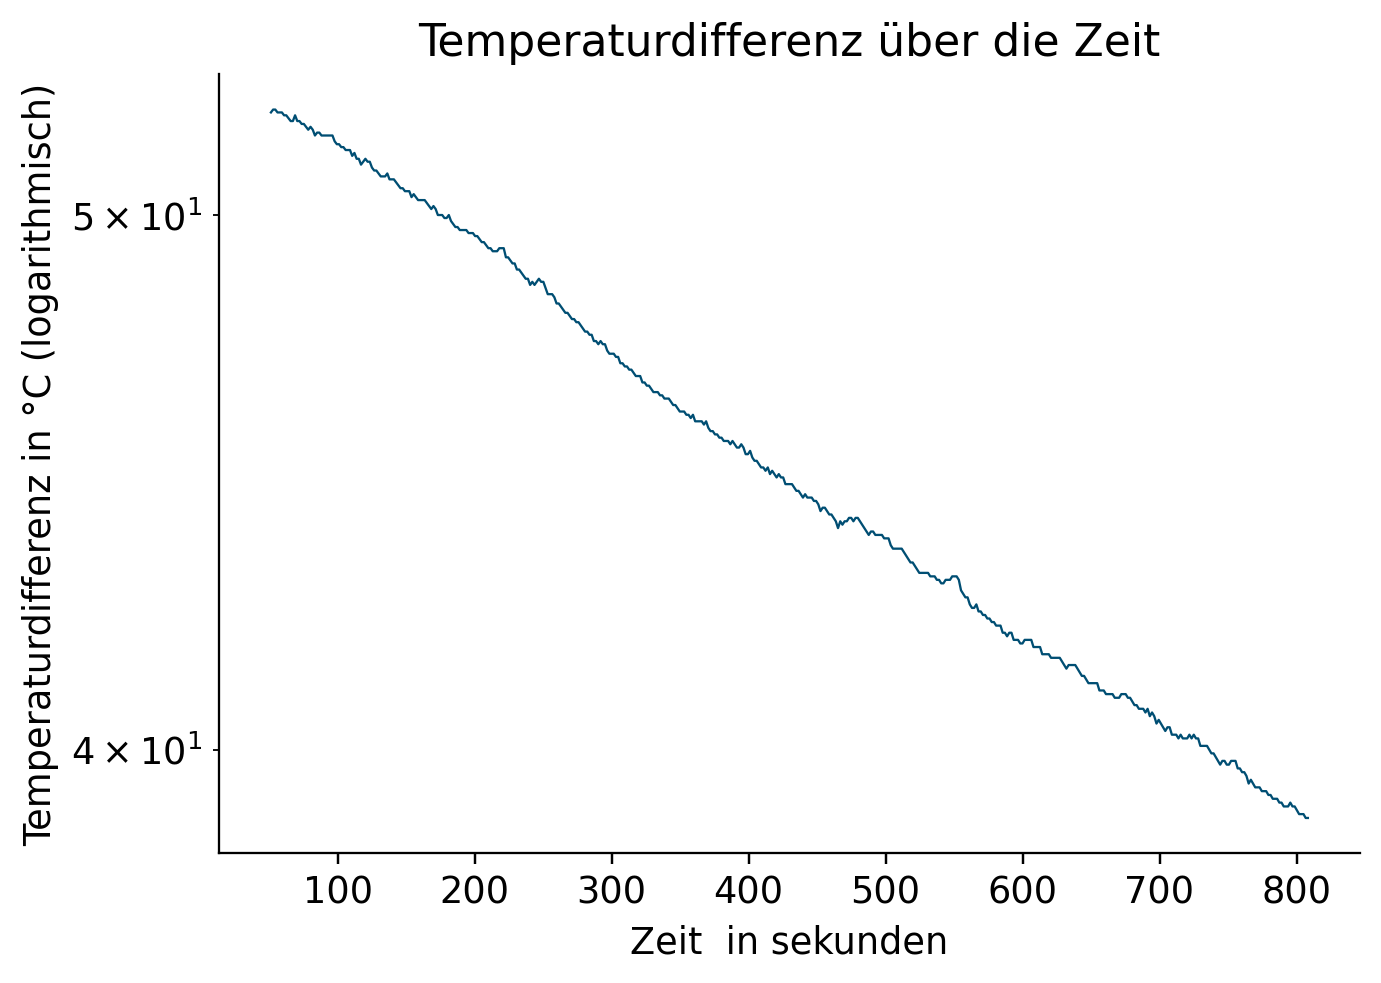

In [4]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt

#Zunächst erstelle ich eine Liste die die Differenztemperaturen beeinhaltet.
temp_dif = [a - b for a, b in zip(temperature_hot,temperature_enviroment)]

#Da die "timestamp" Listen beider Sensoren fast identisch sind kann ich einfach eine Liste für die Messpunkte verwenden.
plt.semilogy(time_sensor_enviroment,temp_dif)
plt.title("Temperaturdifferenz über die Zeit")
plt.xlabel("Zeit  in sekunden")
plt.ylabel("Temperaturdifferenz in °C (logarithmisch)")


plt.show()

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [10]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

import numpy as np

t = time_sensor_enviroment
T1 = temperature_hot[0]
T2 = temperature_enviroment[-1]

Y = np.log(temperature_hot - T2)-np.log(T1-T2)

#Hier kann ich eine lineare Regression anwenden
K = np.polyfit(t, Y, 1)

print(K)


# DONE #

[-0.0004082   0.01387188]


#### (iV) Ergebnis

In [8]:
# TODO: Print result

print("Der experimentell ermitellte Wert für K ist:",K[0])

# DONE #

Der experimentell ermitellte Wert für K ist: -0.00040820086862733234


## Diskussion

Das Newtonsche Abkühlungsgesetzt konnte durch diese Messung bestägt werden. Auch ohne die Rechnung kann man am Semilog. Graphen gut den linearen Abkühlcharakter erkennen. Dieses Abkühlverhalten ist das laut der Aufgabenstellung durch das Newtonsche Abkühlungsgesetzt beschrieben. 
Um diese Messung nicht zu verfälschen habe ich die ersten 30 Messpunkte verworfen (s.o) - Grund dafür ist dass der Sensor sich erst erhitzt hat und der mit diesen Messdaten berechnete k wert nicht im erwartbaren Bereich gelegen hätte.

## Fazit
In diesem Verscuh konnte ich das Newtonsche Abkühlgesetz kennenlernen. Ich habe zudem das erste mal einen Graphen Semilogarithmisch geplottet. Zudem konnte ich lernen wie man eine mathematische Gleichung wie die des newtonschen Abkühlungsgesetztes umformt.
Alles in allem konnte ich meinen Umgang mit GitLab , Jupiterhub und Python als Programmiersprache verbessern.